In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

%matplotlib inline


2023-11-19 20:08:57.973885: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-19 20:08:57.996669: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 20:08:57.996699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 20:08:57.996729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 20:08:58.002528: I tensorflow/core/platform/cpu_feature_g

# Seleção do Conjunto de Dados

O conjunto de dados selecionados foi a fim de predizer o sinal do alfabeto de LIBRAS, o objetivo é predizer o sinal a partir de uma imagem 

# Preparação dos Dados:

In [2]:
im_shape = (128, 128)
TRAINING_DIR = './train'
TEST_DIR = './test'

seed = 10

BATCH_SIZE = 64


In [3]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [4]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)


Found 27774 images belonging to 21 classes.
Found 6940 images belonging to 21 classes.
Found 11548 images belonging to 21 classes.
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


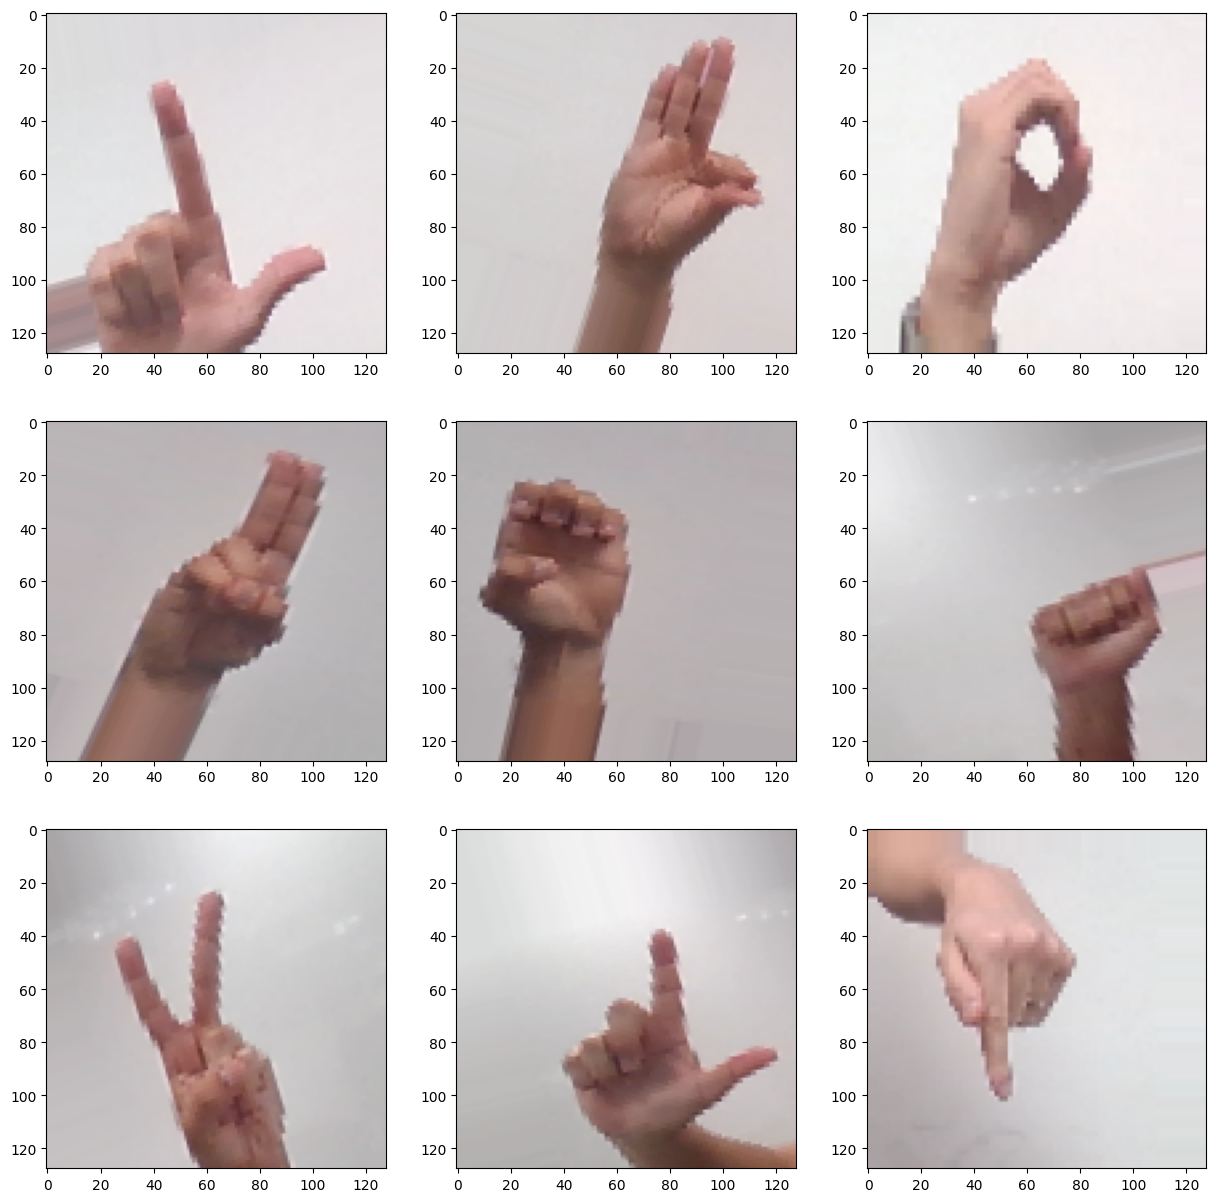

In [5]:
# Import necessary libraries
import scipy
import matplotlib.pyplot as plt

# Visualizing some examples
plt.figure(figsize=(15, 15))

for i in range(9):
    # Generate subfigures
    plt.subplot(330 + 1 + i)

    # Retrieve a batch from the generator and scale to [0, 255]
    batch = train_generator.next()[0] * 255

    # Select the first image from the batch and convert to uint8
    img = batch[i].astype('uint8')

    plt.imshow(img)

plt.show()


In [6]:
from tensorflow.keras.models import load_model
model = load_model('modelo_treinado.h5')


2023-11-19 20:09:01.135531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 20:09:01.139274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 20:09:01.139398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [20]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Carregar o modelo treinado do disco
modelo_carregado = load_model('modelo_treinado.h5')


In [22]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


109/109 [==============================] - 2s 19ms/step - loss: 0.2339 - accuracy: 0.9293
Val loss: 0.23393471539020538
Val accuracy: 0.9292507171630859


In [23]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


181/181 [==============================] - 4s 22ms/step - loss: 0.0721 - accuracy: 0.9773
Test loss: 0.07208507508039474
Test accuracy: 0.9773120880126953


In [24]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


181/181 [==============================] - 3s 17ms/step
Classification Report
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       579
           B       1.00      0.89      0.94       562
           C       1.00      1.00      1.00       583
           D       0.97      0.91      0.94       550
           E       0.98      1.00      0.99       574
           F       0.98      1.00      0.99       450
           G       0.96      1.00      0.98       550
           I       0.99      0.95      0.97       550
           L       0.97      1.00      0.99       550
           M       0.99      0.96      0.97       550
           N       0.92      0.99      0.96       550
           O       1.00      1.00      1.00       550
           P       1.00      1.00      1.00       550
           Q       1.00      0.96      0.98       550
           R       0.93      0.99      0.96       550
           S       1.00      0.99      1.00       550
   

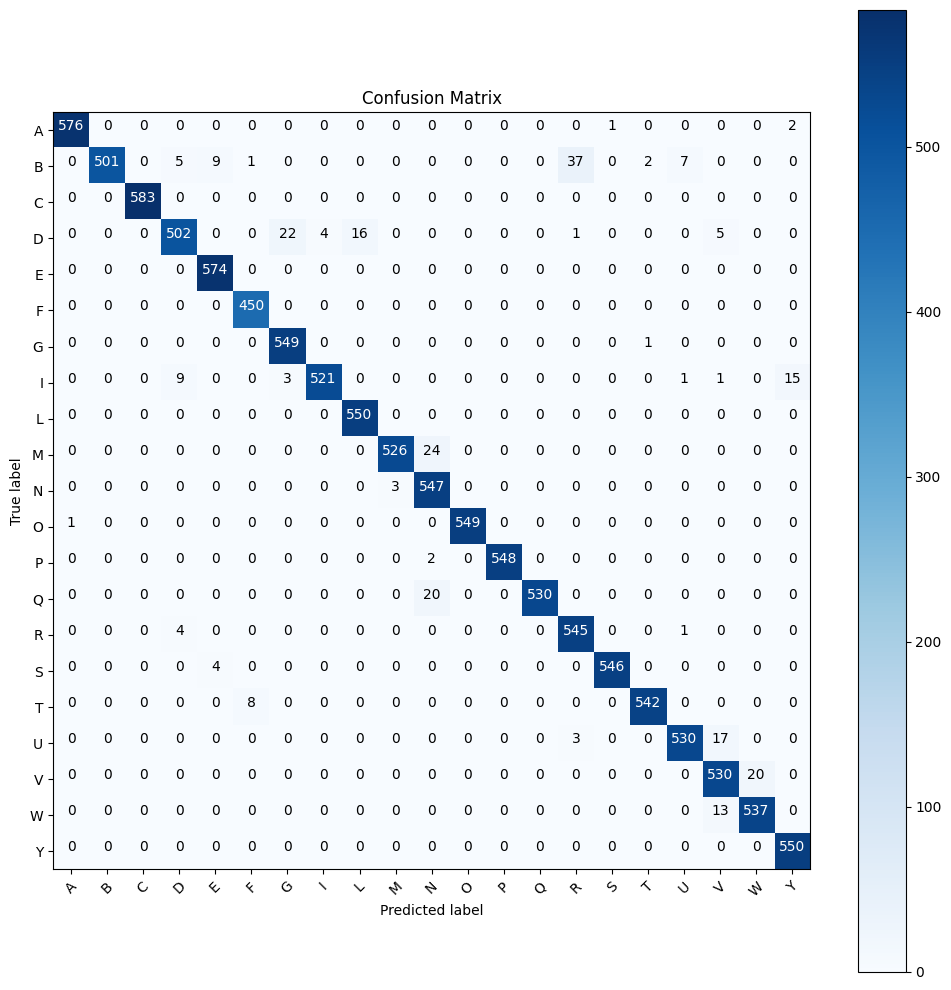

In [27]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


In [33]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Carregue a foto
image_path = "./C.jpeg"
img = Image.open(image_path)

# Redimensione para o tamanho esperado (224, 224)
img = img.resize((224, 224))

# Converta a imagem para um array numpy
img_array = image.img_to_array(img)

# Adicione uma dimensão extra para representar o batch (necessário para o modelo)
img_array = np.expand_dims(img_array, axis=0)

# Normalize os valores dos pixels para o intervalo [0, 1]
img_array /= 255.0

# Faça a predição
prediction = model.predict(img_array)

# Converta as probabilidades preditas em uma classe
predicted_class = np.argmax(prediction)

# Obtenha o nome da classe correspondente
predicted_class_name = classes[predicted_class]

print(f"A imagem é classificada como: {predicted_class_name}")


1/1 [==============================] - 0s 13ms/step
A imagem é classificada como: C
